In [1]:
#basic package
import tqdm
import os
import numpy as np
import pandas as pd
import sys
import time
import glob
import datetime as dt
import itertools
import math
import random
import pickle
from scipy import stats
from scipy.stats import pearsonr, spearmanr
#plot
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap  # to define our own palette for plots

In [2]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

path_extracted_data = config.path_extracted_data
id_run = config.id_run
print(id_run)

ALLDATA_


# Download mean and CI estimates

In [3]:
df_IC = pd.read_csv(os.path.join(path_extracted_data,'df_CI_BRMS_BS_pred_allvar_moreit.csv'), sep=',')
#df_IC = pd.read_csv(os.path.join(path_extracted_data,'df_CI_BRMS_BS_pred.csv'), sep=',')

print(df_IC.shape) 
display(df_IC.head(3))

df_mean = pd.read_csv(os.path.join(path_extracted_data,'df_mean_BRMS_BS_pred_allvar_moreit.csv'), sep=',')
#df_mean = pd.read_csv(os.path.join(path_extracted_data,'df_mean_BRMS_BS_pred.csv'), sep=',')

print(df_mean.shape) 
display(df_mean.head(3))

df = pd.merge(df_mean, df_IC, on=['Unnamed: 0'], how='outer')
df.rename(columns={'Unnamed: 0':'parameter','x':'value_mean'}, inplace=True)
df['text'] = df.apply(lambda x: str(round(x['value_mean'],2))+' ['+str(round(x['lower'],2))+', '+str(round(x['upper'],2))+']', 
                          axis=1)
print(df.shape) 
display(df.head(3))

(996, 3)


,Unnamed: 0,lower,upper
0,b_foodreactivityindexcst_Intercept,-0.212365,-0.115696
1,b_verticaltraveldistancefulllightperinsideh_In...,3.940643,4.538882
2,b_midcumZ4hMorning_Intercept,1.473613,1.530246


(996, 2)


,Unnamed: 0,x
0,b_foodreactivityindexcst_Intercept,-0.164280
1,b_verticaltraveldistancefulllightperinsideh_In...,4.253126
2,b_midcumZ4hMorning_Intercept,1.502410


(996, 5)


,parameter,value_mean,lower,upper,text
0,b_foodreactivityindexcst_Intercept,-0.164280,-0.212365,-0.115696,"-0.16 [-0.21, -0.12]"
1,b_verticaltraveldistancefulllightperinsideh_In...,4.253126,3.940643,4.538882,"4.25 [3.94, 4.54]"
2,b_midcumZ4hMorning_Intercept,1.502410,1.473613,1.530246,"1.5 [1.47, 1.53]"


In [4]:
display(list(df['parameter'].unique()))

['b_foodreactivityindexcst_Intercept',
 'b_verticaltraveldistancefulllightperinsideh_Intercept',
 'b_midcumZ4hMorning_Intercept',
 'b_SleepingNotUppest_Intercept',
 'b_WentinWG_Intercept',
 'b_foodreactivityindexcst_TreatmentOFH',
 'b_foodreactivityindexcst_FoodPenIDFoodPenID5M8',
 'b_foodreactivityindexcst_FoodPenIDFoodPenID9M12',
 'b_foodreactivityindexcst_scaleweightInterp',
 'b_foodreactivityindexcst_scaleKBFInterp',
 'b_foodreactivityindexcst_scaleDIB',
 'b_verticaltraveldistancefulllightperinsideh_TreatmentOFH',
 'b_verticaltraveldistancefulllightperinsideh_scaleweightInterp',
 'b_verticaltraveldistancefulllightperinsideh_scaleKBFInterp',
 'b_verticaltraveldistancefulllightperinsideh_scaleDIB',
 'b_midcumZ4hMorning_TreatmentOFH',
 'b_midcumZ4hMorning_scaleweightInterp',
 'b_midcumZ4hMorning_scaleKBFInterp',
 'b_midcumZ4hMorning_scaleDIB',
 'b_SleepingNotUppest_TreatmentOFH',
 'b_SleepingNotUppest_scaleweightInterp',
 'b_SleepingNotUppest_scaleKBFInterp',
 'b_SleepingNotUppest_sca

In [5]:
df['type'] = df['parameter'].map(lambda x: x.split('_')[0])
df['type'].value_counts()

r        950
b         27
cor       10
sd         5
shape      2
sigma      1
lp         1
Name: type, dtype: int64

In [6]:
#henID intercept random intercept
df['HenID'] = df['parameter'].map(lambda x: x.split(',')[0].split('[')[-1] if 'hen_' in x else None)
#else None, otherwise will utput the entire name (i.e. x)
df['HenID'].unique()

array([None, 'hen_1', 'hen_10', 'hen_101', 'hen_102', 'hen_105',
       'hen_106', 'hen_107', 'hen_108', 'hen_109', 'hen_111', 'hen_112',
       'hen_113', 'hen_115', 'hen_116', 'hen_118', 'hen_119', 'hen_12',
       'hen_120', 'hen_122', 'hen_123', 'hen_124', 'hen_126', 'hen_127',
       'hen_128', 'hen_13', 'hen_131', 'hen_133', 'hen_134', 'hen_135',
       'hen_136', 'hen_137', 'hen_138', 'hen_139', 'hen_14', 'hen_140',
       'hen_141', 'hen_142', 'hen_143', 'hen_144', 'hen_145', 'hen_146',
       'hen_147', 'hen_149', 'hen_15', 'hen_150', 'hen_151', 'hen_152',
       'hen_153', 'hen_154', 'hen_155', 'hen_156', 'hen_158', 'hen_159',
       'hen_163', 'hen_164', 'hen_165', 'hen_166', 'hen_167', 'hen_168',
       'hen_169', 'hen_17', 'hen_170', 'hen_171', 'hen_172', 'hen_173',
       'hen_174', 'hen_175', 'hen_177', 'hen_18', 'hen_180', 'hen_181',
       'hen_182', 'hen_183', 'hen_184', 'hen_185', 'hen_186', 'hen_187',
       'hen_188', 'hen_189', 'hen_19', 'hen_190', 'hen_191', 'hen

In [7]:
#mvt variable for the hen intercepts to be visualised
df['mvtvariable'] = df['parameter'].map(lambda x: x.split('r_HenID__')[-1].split('[')[0] if ('r_HenID__' in x) \
                                        & ('cor_HenID' not in x) else None)
li_mvt = [i for i in df['mvtvariable'].unique() if i!=None]
li_mvt

['foodreactivityindexcst',
 'verticaltraveldistancefulllightperinsideh',
 'midcumZ4hMorning',
 'SleepingNotUppest',
 'WentinWG']

In [8]:
#correlations
df_cor_summarized = df[df['type']=='cor'].copy()
for mvt in li_mvt:
    df_cor_summarized[mvt] = df_cor_summarized['parameter'].map(lambda x: mvt in x)
df_cor_summarized

,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable,foodreactivityindexcst,verticaltraveldistancefulllightperinsideh,midcumZ4hMorning,SleepingNotUppest,WentinWG
32,cor_HenID__foodreactivityindexcst_Intercept__v...,-0.334379,-0.473739,-0.209080,"-0.33 [-0.47, -0.21]",cor,None,None,True,True,False,False,False
33,cor_HenID__foodreactivityindexcst_Intercept__m...,0.080675,-0.080575,0.225557,"0.08 [-0.08, 0.23]",cor,None,None,True,False,True,False,False
34,cor_HenID__verticaltraveldistancefulllightperi...,-0.013797,-0.156437,0.136018,"-0.01 [-0.16, 0.14]",cor,None,None,False,True,True,False,False
35,cor_HenID__foodreactivityindexcst_Intercept__S...,-0.112690,-0.254262,0.053888,"-0.11 [-0.25, 0.05]",cor,None,None,True,False,False,True,False
36,cor_HenID__verticaltraveldistancefulllightperi...,0.235596,0.079416,0.385328,"0.24 [0.08, 0.39]",cor,None,None,False,True,False,True,False
37,cor_HenID__midcumZ4hMorning_Intercept__Sleepin...,0.051567,-0.111252,0.201302,"0.05 [-0.11, 0.2]",cor,None,None,False,False,True,True,False
38,cor_HenID__foodreactivityindexcst_Intercept__W...,-0.208492,-0.358653,-0.053371,"-0.21 [-0.36, -0.05]",cor,None,None,True,False,False,False,True
39,cor_HenID__verticaltraveldistancefulllightperi...,0.511511,0.392347,0.621436,"0.51 [0.39, 0.62]",cor,None,None,False,True,False,False,True
40,cor_HenID__midcumZ4hMorning_Intercept__WentinW...,-0.035699,-0.190462,0.119674,"-0.04 [-0.19, 0.12]",cor,None,None,False,False,True,False,True
41,cor_HenID__SleepingNotUppest_Intercept__Wentin...,-0.059982,-0.220942,0.104050,"-0.06 [-0.22, 0.1]",cor,None,None,False,False,False,True,True


In [9]:
#sd
df_sd_summarized = df[df['type']=='sd'].copy()
df_sd_summarized['parameter'] = df_sd_summarized['parameter'].map(lambda x: x.split('sd_HenID__')[-1])
df_sd_summarized

,parameter,value_mean,lower,upper,text,type,HenID,mvtvariable
27,foodreactivityindexcst_Intercept,0.149745,0.133604,0.167207,"0.15 [0.13, 0.17]",sd,None,None
28,verticaltraveldistancefulllightperinsideh_Inte...,1.481875,1.325387,1.643736,"1.48 [1.33, 1.64]",sd,None,None
29,midcumZ4hMorning_Intercept,0.139822,0.125078,0.155786,"0.14 [0.13, 0.16]",sd,None,None
30,SleepingNotUppest_Intercept,2.275438,1.969804,2.596000,"2.28 [1.97, 2.6]",sd,None,None
31,WentinWG_Intercept,2.172761,1.886441,2.495324,"2.17 [1.89, 2.5]",sd,None,None


# correlation matrix

In [10]:
dico_mvt_name = {'foodreactivityindexcst':'food reactivity index',
                 'verticaltraveldistancefulllightperinsideh':'vertical travelled distance',
                 'midcumZ4hMorning':'mid-nestbox zone usage',
                 'SleepingNotUppest':'has slept down',
                 'WentinWG':'has been outside'}

['foodreactivityindexcst', 'verticaltraveldistancefulllightperinsideh', 'midcumZ4hMorning', 'SleepingNotUppest', 'WentinWG']
[[        nan -0.33437862  0.08067541 -0.11269038 -0.20849153]
 [        nan         nan -0.01379739  0.23559563  0.51151115]
 [        nan         nan         nan  0.05156655 -0.03569938]
 [        nan         nan         nan         nan -0.05998232]
 [        nan         nan         nan         nan         nan]]


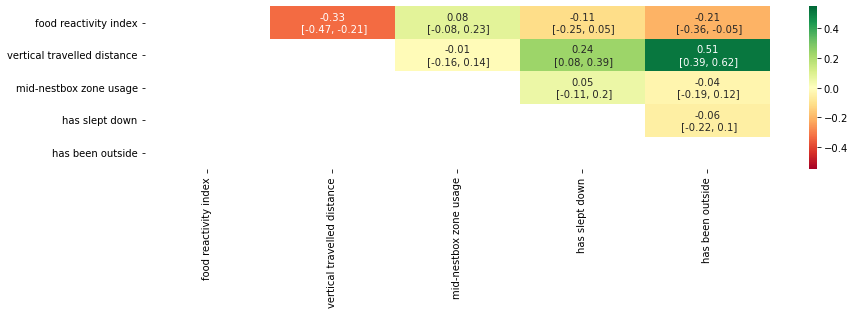

In [28]:
print(li_mvt)
CorrM = np.zeros(shape=(len(li_mvt), len(li_mvt)))
labels_ = np.array([['                                '] * len(li_mvt)] * len(li_mvt))
for i in range(0,len(li_mvt)):
    CorrM[i][i] = np.nan
    for j in range(i+1,len(li_mvt)):
        mvt1 = li_mvt[i]
        mvt2 = li_mvt[j]
        v = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]     
        CorrM[i][j] = v
        CorrM[j][i] = np.nan
        t = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['text'].values[0] 
        t = t.replace(' [','\n [')
        labels_[i][j] = t
        labels_[j][i] = ''
print(CorrM)
#print(labels_)
plt.figure(figsize=(14,3)) #9, 6.5
sns.heatmap(CorrM, cmap='RdYlGn', annot=labels_, fmt = '', 
            xticklabels=[dico_mvt_name[i] for i in li_mvt], yticklabels=[dico_mvt_name[i] for i in li_mvt],
           vmin=-0.55, vmax=0.55)
#fmt = ''is required for string labels
plt.xlabel('');
plt.ylabel('');
plt.savefig(os.path.join(path_extracted_data,'BS_corr.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

#covariance matrix
#Cov(X,Y) = corr(X,Y) * SD(X) * SD(Y) 
print(li_mvt)
CovM = np.zeros(shape=(len(li_mvt), len(li_mvt)))
for i in range(0,len(li_mvt)):
    mvt1 = li_mvt[i]
    CovM[i][i] = round(df_sd_summarized[df_sd_summarized['parameter']==mvt1+'_Intercept']['value_mean'].values[0]**2,2)
    for j in range(i+1,len(li_mvt)):
        mvt2 = li_mvt[j]
        cor12 = df_cor_summarized[(df_cor_summarized[mvt1])&(df_cor_summarized[mvt2])]['value_mean'].values[0]  
        sd1 = df_sd_summarized[df_sd_summarized['parameter']==mvt1+'_Intercept']['value_mean'].values[0]
        sd2 = df_sd_summarized[df_sd_summarized['parameter']==mvt2+'_Intercept']['value_mean'].values[0]
        CovM[i][j] = round(cor12 * sd1 * sd2,2)
        CovM[j][i] = round(cor12 * sd1 * sd2,2)
print(CovM)

A = [[1,0.4,0.2],
     [0.4,1,-0.3], 
     [0.2,-0.3,1]]
w,v = eig(A)
print('Eigen value: \n', w)
print('Eigen vector: \n', v)
import numpy as np
from numpy.linalg import eig
#in R: https://aedin.github.io/PCAworkshop/articles/b_PCA.html
w,v = eig(M)
print('Eigen value: \n', w)
print('Eigen vector: \n', v)

df_boi = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values='value_mean').reset_index()
print(df_boi.shape)
df_boi.head(3)

#from R output from eigen(CorrM):
dico_mvt_pc1 = {'foodrelatedbehaviorfinalinvcst':0.331915472905767,
                 'scaleVTD':-0.657543662574007,
                 'midcumZ4hMorning':0.0275237778296617,
                 'SleepingNotUppest':-0.304410994004366,
                 'mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind':-0.445022081119278,
                 'nbrvisitZ4Morningmore60sec':-0.407431204443187}

dico_mvt_pc2 = {'foodrelatedbehaviorfinalinvcst':0.466986355151282,
                 'scaleVTD':0.0808792555080489,
                 'midcumZ4hMorning':0.55994440,
                 'SleepingNotUppest':0.12455142 ,
                 'mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind':-0.34535655,
                 'nbrvisitZ4Morningmore60sec':0.57189191}
dico_mvt_pc1_3var = {'foodrelatedbehaviorfinalinvcst':0.4854501 ,
                 'scaleVTD':-0.6394040 ,
                 'mulatency1Zone15mn3hOPP_latency1Zone15mn3hbind':-0.5962389}


#compute pc1 and pc2
df_boi = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values='value_mean').reset_index()
print(df_boi.shape)
df_boi.head(3)
df_boi['pc1'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc1.items()]), axis=1)
df_boi['pc2'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc2.items()]), axis=1)
df_boi['pc1_only3var'] = df_boi.apply(lambda x: sum([x[k]*v for k,v in dico_mvt_pc1_3var.items()]), axis=1)

sns.scatterplot(x='pc1', y='pc2', data=df_boi);

# Behavioural syndrome

In [17]:
li_ = ['caca','1caca2']
li_ = sorted(li_)
li_

['1caca2', 'caca']

In [ ]:
VTD & food: tomato, dark orange
Food & wg: sandybrown, lightsalmon
VTD sleeping : yellowgreen ,lightgreen
VTD WG green, darkgreen, forestgreen

,HenID_,value_mean_SleepingNotUppest,value_mean_WentinWG,value_mean_foodreactivityindexcst,value_mean_midcumZ4hMorning,value_mean_verticaltraveldistancefulllightperinsideh,lower_SleepingNotUppest,lower_WentinWG,lower_foodreactivityindexcst,lower_midcumZ4hMorning,lower_verticaltraveldistancefulllightperinsideh,upper_SleepingNotUppest,upper_WentinWG,upper_foodreactivityindexcst,upper_midcumZ4hMorning,upper_verticaltraveldistancefulllightperinsideh
0,hen_1,-2.293234,2.203905,-0.022842,-0.156960,-0.595573,-5.468077,0.021782,-0.138208,-0.256393,-1.285048,0.646150,4.598458,0.088417,-0.066563,0.109089
1,hen_10,5.361050,-2.092195,0.142310,-0.142091,-0.913147,3.507839,-3.020675,0.067695,-0.206368,-1.415616,7.334283,-1.210842,0.221022,-0.082371,-0.436393
2,hen_101,1.613505,1.924967,-0.027597,0.024041,0.572438,0.751850,0.368264,-0.105421,-0.039092,0.091838,2.534973,3.567984,0.054821,0.084146,1.048614


foodreactivityindexcst
verticaltraveldistancefulllightperinsideh
-0.334378619478211
0.149745218849895
1.48187517815296
-3.3090029859752157


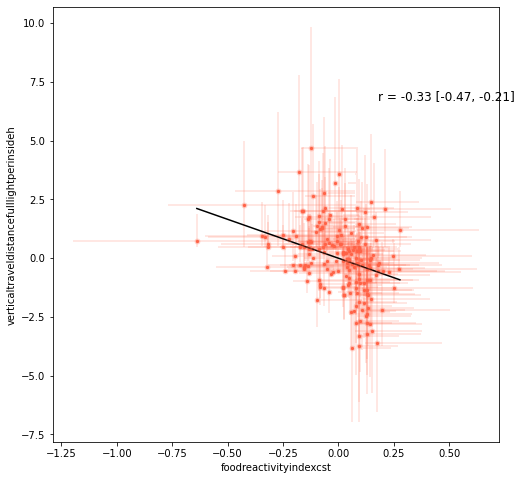

foodreactivityindexcst
midcumZ4hMorning
0.0806754076000442
0.149745218849895
0.139821776711554
0.07532914181970822


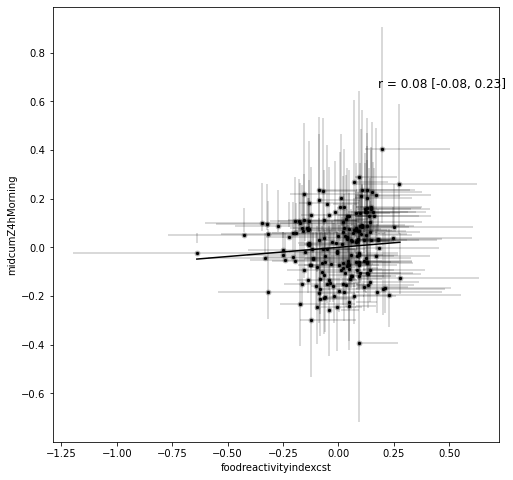

foodreactivityindexcst
SleepingNotUppest
-0.112690380394409
0.149745218849895
2.27543783189584
-1.7123749045851506


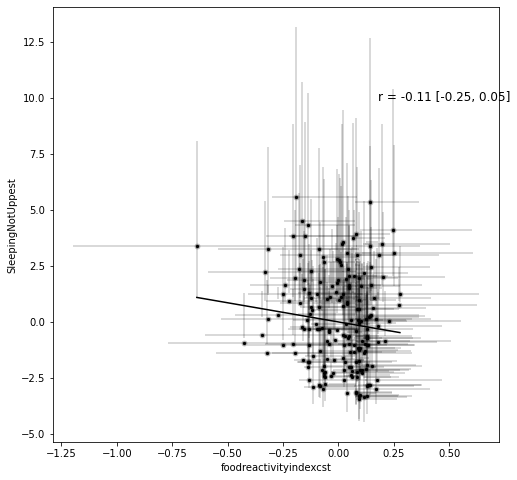

foodreactivityindexcst
WentinWG
-0.208491533513236
0.149745218849895
2.17276097624956
-3.025153466502841


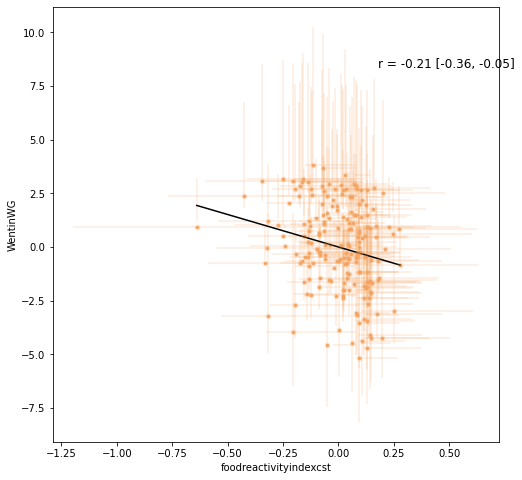

verticaltraveldistancefulllightperinsideh
midcumZ4hMorning
-0.0137973883379137
1.48187517815296
0.139821776711554
-0.0013018474024181527


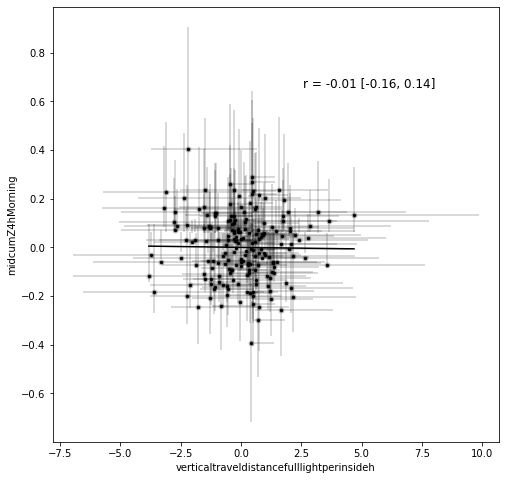

verticaltraveldistancefulllightperinsideh
SleepingNotUppest
0.235595631305374
1.48187517815296
2.27543783189584
0.3617600324271692


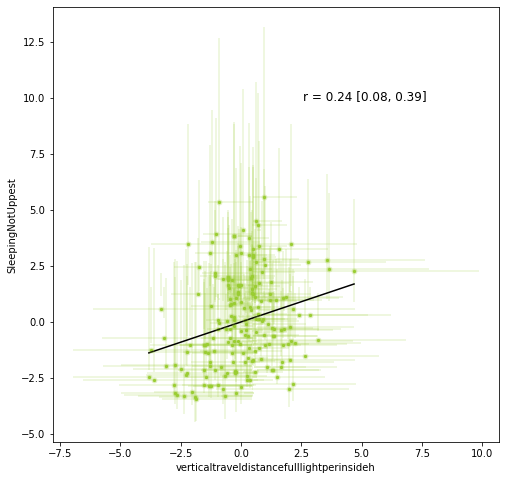

verticaltraveldistancefulllightperinsideh
WentinWG
0.511511149075752
1.48187517815296
2.17276097624956
0.7499899316848175


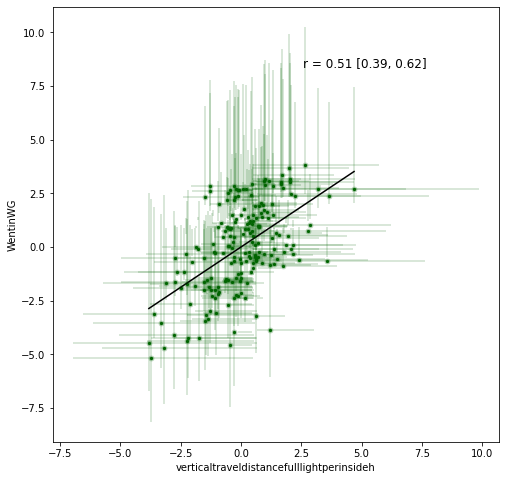

midcumZ4hMorning
SleepingNotUppest
0.0515665485446297
0.139821776711554
2.27543783189584
0.8391859850329582


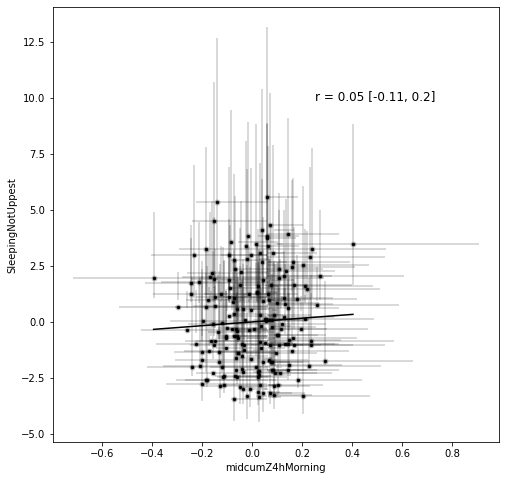

midcumZ4hMorning
WentinWG
-0.0356993805838491
0.139821776711554
2.17276097624956
-0.554750646380958


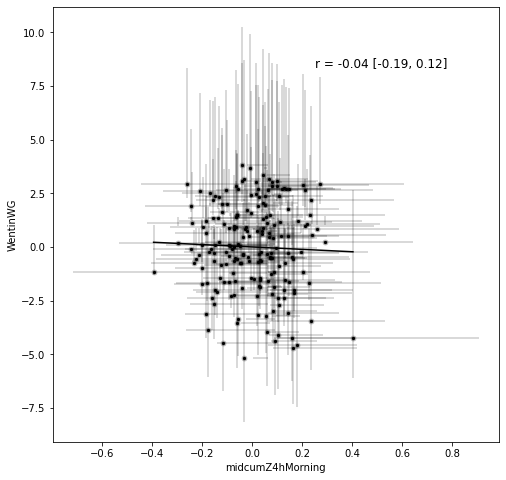

SleepingNotUppest
WentinWG
-0.0599823199800754
2.27543783189584
2.17276097624956
-0.05727567780176908


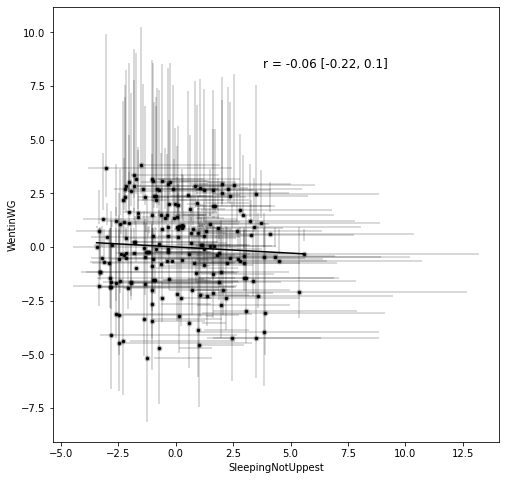

In [25]:
#choose color: https://matplotlib.org/stable/gallery/color/named_colors.html
#df[df['HenID'].isnull()].shape
df_plt = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values=['value_mean',
                                                                                       'lower','upper']).reset_index()
df_plt.columns = ['_'.join(col) for col in df_plt.columns.values] #joining name from different index
display(df_plt.head(3))
for i in range(0,len(li_mvt)-1):
    for j in range(i+1,len(li_mvt)):
        mvtx = li_mvt[i]
        mvty = li_mvt[j]
        print(mvtx)
        print(mvty)
        cor_mvtx_mvty = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['value_mean'].iloc[0]
        cor_mvtx_mvty_upper = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['upper'].iloc[0]
        cor_mvtx_mvty_lower = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['lower'].iloc[0]
        print(cor_mvtx_mvty)
        sd_mvtx = df_sd_summarized[df_sd_summarized['parameter']==mvtx+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvtx)
        sd_mvty = df_sd_summarized[df_sd_summarized['parameter']==mvty+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvty)        
        slope = cor_mvtx_mvty*sd_mvtx*sd_mvty/(sd_mvtx*sd_mvtx)
        print(slope)
        #choose color:
        li_ = [mvtx, mvty]
        if ('foodreactivityindexcst' in li_) & ('verticaltraveldistancefulllightperinsideh' in li_):
            color_ = 'tomato'
        elif ('foodreactivityindexcst' in li_) & ('WentinWG' in li_):
            color_ = 'sandybrown' #lightsalmon
        elif ('verticaltraveldistancefulllightperinsideh' in li_) & ('SleepingNotUppest' in li_):
            color_ = 'yellowgreen'
        elif ('verticaltraveldistancefulllightperinsideh' in li_) & ('WentinWG' in li_):
            color_ = 'darkgreen'
        else:
            color_ = 'black'
        plt.figure(figsize=(8,8))
        #ax = sns.scatterplot(data=df_plt, x='value_mean_'+mvtx,  y='value_mean_'+mvty)#,  size="size", sizes=(20, 200))
        plt.scatter(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(), color=color_, s=5)
        plt.errorbar(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(),
                     xerr=[df_plt['lower_'+mvtx].tolist(),df_plt['upper_'+mvtx].tolist()], 
                     yerr=[df_plt['lower_'+mvty].tolist(),df_plt['upper_'+mvty].tolist()],
                     fmt="o", color=color_, alpha=0.2,ms=5)
        plt.xlabel(mvtx)
        plt.ylabel(mvty)
        x_min = min(df_plt['value_mean_'+mvtx].tolist())
        y_min = x_min*slope
        x_max = max(df_plt['value_mean_'+mvtx].tolist())
        y_max = x_max*slope
        plt.plot([x_min, x_max], [y_min, y_max], color='black')
        text_ = 'r = '+str(round(cor_mvtx_mvty,2))+' ['+str(round(cor_mvtx_mvty_lower,2))+', '+str(round(cor_mvtx_mvty_upper,2))+']'
        plt.text(max(df_plt['upper_'+mvtx].tolist())*0.5, max(df_plt['upper_'+mvty].tolist())*1.3, text_, fontsize=12)
        #plt.set_xlim([x_min, x_max])   
        plt.savefig(os.path.join(path_extracted_data,'BS_'+mvtx+'_'+mvty+'.png'),dpi=300,format='png',bbox_inches='tight')
        plt.show();

li_all_hen = [x for x in df['HenID'].unique() if x!=None]
#select 5 random hens
li_all_hen = [x for x in df['HenID'].unique() if x!=None]
random.seed(0)
li_rsh = random.sample(li_all_hen,5)
print(li_rsh)

#choose color: https://matplotlib.org/stable/gallery/color/named_colors.html
#li_nicecolor_brighter = ['blue','fuchsia','orange','lime','cyan','yellow','crimson','olive'] #arty but not sciency
li_nicecolor_brighter = ['mediumblue','deeppink','goldenrod','green','cyan','yellow','crimson','olive']
for i,henID in enumerate(li_rsh):
    pal_[henID] = li_nicecolor_brighter[i]

#df[df['HenID'].isnull()].shape
df_plt = df[~df['HenID'].isnull()].pivot(index='HenID', columns='mvtvariable', values=['value_mean',
                                                                                       'lower','upper']).reset_index()
df_plt.columns = ['_'.join(col) for col in df_plt.columns.values] #joining name from different index
df_plt['hen_color'] = df_plt['HenID_'].map(lambda x: pal_.get(x,'black'))
display(df_plt.head(3))
for i in range(0,len(li_mvt)-1):
    for j in range(i+1,len(li_mvt)):
        mvtx = li_mvt[i]
        mvty = li_mvt[j]
        print(mvtx)
        print(mvty)
        cor_mvtx_mvty = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['value_mean'].iloc[0]
        cor_mvtx_mvty_upper = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['upper'].iloc[0]
        cor_mvtx_mvty_lower = df_cor_summarized[(df_cor_summarized[mvtx])&(df_cor_summarized[mvty])]['lower'].iloc[0]
        print(cor_mvtx_mvty)
        sd_mvtx = df_sd_summarized[df_sd_summarized['parameter']==mvtx+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvtx)
        sd_mvty = df_sd_summarized[df_sd_summarized['parameter']==mvty+'_Intercept']['value_mean'].iloc[0]
        print(sd_mvty)        
        slope = cor_mvtx_mvty*sd_mvtx*sd_mvty/(sd_mvtx*sd_mvtx)
        print(slope)
        plt.figure(figsize=(8,8))
        #ax = sns.scatterplot(data=df_plt, x='value_mean_'+mvtx,  y='value_mean_'+mvty)#,  size="size", sizes=(20, 200))
        li_col = df_plt['hen_color'].tolist()
        plt.scatter(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(), color=li_col, s=5)
        plt.errorbar(df_plt['value_mean_'+mvtx].tolist(), df_plt['value_mean_'+mvty].tolist(),
                     xerr=[df_plt['lower_'+mvtx].tolist(),df_plt['upper_'+mvtx].tolist()], 
                     yerr=[df_plt['lower_'+mvty].tolist(),df_plt['upper_'+mvty].tolist()],
                     fmt="o", color='black', alpha=0.2,ms=5)
        plt.xlabel(mvtx)
        plt.ylabel(mvty)
        x_min = min(df_plt['value_mean_'+mvtx].tolist())
        y_min = x_min*slope
        x_max = max(df_plt['value_mean_'+mvtx].tolist())
        y_max = x_max*slope
        plt.plot([x_min, x_max], [y_min, y_max], color='black')
        text_ = 'r = '+str(round(cor_mvtx_mvty,2))+' ['+str(round(cor_mvtx_mvty_lower,2))+', '+str(round(cor_mvtx_mvty_upper,2))+']'
        plt.text(max(df_plt['upper_'+mvtx].tolist())*0.5, max(df_plt['upper_'+mvty].tolist())*1.3, text_, fontsize=12)
        #plt.set_xlim([x_min, x_max])   
        #plt.savefig(os.path.join(path_extracted_data,'BS_'+mvtx+'_'+mvty+'.png'),dpi=300,format='png',bbox_inches='tight')
        plt.show();

# Repeatability

In [129]:
#search in any folder and create a list of img paths
#os.walk: Python method walk() generates the file names in a directory tree by walking the tree top-down or bottom-up
#to avoid saving images several times, we will do it specifically for images in the KBF folder:
li_df = []
for path_ in glob.glob(os.path.join(path_extracted_data,'R_estimates_*.csv')):
    print('--------------------- files %s'%path_.split('\\')[-1])
    df_ = pd.read_csv(path_, sep=',')
    print(df_.shape) 
    display(df_.head(3))
    li_df.append(df_)
    
print('------------------------- ALL TOGETHER:')
df_R = pd.concat(li_df)    
print(df_R.shape) 
display(df_R.head(3))

--------------------- files R_estimates_food.csv
(6, 8)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_CILbasic,li_CIUbasic,li_BStype,li_mvt
0,1,0.447633,0.419588,0.476509,0.340107,0.397027,time,food_related_behavior_final_inv_cst
1,2,0.602509,0.493890,0.704359,0.086548,0.297017,LP2,food_related_behavior_final_inv_cst
2,3,0.601495,0.504769,0.684354,0.106184,0.285769,LP10,food_related_behavior_final_inv_cst


--------------------- files R_estimates_MZ4.csv
(6, 8)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_CILbasic,li_CIUbasic,li_BStype,li_mvt
0,1,0.523169,0.488411,0.558536,0.420012,0.490137,time,mid_cum_Z4_h_Morning
1,2,0.661765,0.505669,0.791306,0.172794,0.458431,LP2,mid_cum_Z4_h_Morning
2,3,0.560277,0.411785,0.727047,-0.051007,0.264256,LP10,mid_cum_Z4_h_Morning


--------------------- files R_estimates_SNU.csv
(6, 8)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt
0,1,0.511535,0.406939,0.567895,190,3143,time,Sleeping_NotUppest
1,2,0.720149,0.561181,0.959864,153,457,LP2,Sleeping_NotUppest
2,3,0.712281,0.514640,0.797525,150,444,LP10,Sleeping_NotUppest


--------------------- files R_estimates_VTD.csv
(6, 8)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt
0,1,0.698037,0.648182,0.736572,190,3143,time,vertical_travel_distance_fulllight_perinsideh
1,2,0.767633,0.711742,0.817983,153,457,LP2,vertical_travel_distance_fulllight_perinsideh
2,3,0.755626,0.691488,0.808206,150,444,LP10,vertical_travel_distance_fulllight_perinsideh


--------------------- files R_estimates_WG.csv
(6, 8)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_ngroup,li_nobs,li_BStype,li_mvt
0,1,0.509187,0.414215,0.573776,190,3143,time,WentinWG
1,2,0.544650,0.320773,0.665463,153,457,LP2,WentinWG
2,3,0.932853,0.962446,0.991355,150,444,LP10,WentinWG


------------------------- ALL TOGETHER:
(30, 10)


,Unnamed: 0,li_R,li_CIL,li_CIU,li_CILbasic,li_CIUbasic,li_BStype,li_mvt,li_ngroup,li_nobs
0,1,0.447633,0.419588,0.476509,0.340107,0.397027,time,food_related_behavior_final_inv_cst,NaN,NaN
1,2,0.602509,0.493890,0.704359,0.086548,0.297017,LP2,food_related_behavior_final_inv_cst,NaN,NaN
2,3,0.601495,0.504769,0.684354,0.106184,0.285769,LP10,food_related_behavior_final_inv_cst,NaN,NaN


In [130]:
#create a matrix with each row correpsonding to a movement behavior and each column a situation (over time, wihtin a context,
#across context)
#add R and 96% interval as a text column
df_R['text'] = df_R.apply(lambda x: str(round(x['li_R'],2))+' ['+str(round(x['li_CIL'],2))+', '+str(round(x['li_CIU'],2))+']', 
                          axis=1)
df_R.head(3)

,Unnamed: 0,li_R,li_CIL,li_CIU,li_CILbasic,li_CIUbasic,li_BStype,li_mvt,li_ngroup,li_nobs,text
0,1,0.447633,0.419588,0.476509,0.340107,0.397027,time,food_related_behavior_final_inv_cst,NaN,NaN,"0.45 [0.42, 0.48]"
1,2,0.602509,0.493890,0.704359,0.086548,0.297017,LP2,food_related_behavior_final_inv_cst,NaN,NaN,"0.6 [0.49, 0.7]"
2,3,0.601495,0.504769,0.684354,0.106184,0.285769,LP10,food_related_behavior_final_inv_cst,NaN,NaN,"0.6 [0.5, 0.68]"


In [131]:
dico_bstype_order = {'AC':6, 'LP10':5, 'LP2':2, 'VD':4, 'cold':3, 'time':1}
dico_bstype_name = {'AC':'AC', 'LP10':'LLS', 'LP2':'ELS', 'VD':'VD', 'cold':'CET', 'time':'OT'}
df_R['order'] = df_R['li_BStype'].map(lambda x: dico_bstype_order[x])
df_R['li_BStype'] = df_R['li_BStype'].map(lambda x: dico_bstype_name[x])
df_R = df_R.sort_values(['order'])
df_R

,Unnamed: 0,li_R,li_CIL,li_CIU,li_CILbasic,li_CIUbasic,li_BStype,li_mvt,li_ngroup,li_nobs,text,order
0,1,0.447633,0.419588,0.476509,0.340107,0.397027,OT,food_related_behavior_final_inv_cst,NaN,NaN,"0.45 [0.42, 0.48]",1
0,1,0.698037,0.648182,0.736572,NaN,NaN,OT,vertical_travel_distance_fulllight_perinsideh,190.0,3143.0,"0.7 [0.65, 0.74]",1
0,1,0.511535,0.406939,0.567895,NaN,NaN,OT,Sleeping_NotUppest,190.0,3143.0,"0.51 [0.41, 0.57]",1
0,1,0.523169,0.488411,0.558536,0.420012,0.490137,OT,mid_cum_Z4_h_Morning,NaN,NaN,"0.52 [0.49, 0.56]",1
0,1,0.509187,0.414215,0.573776,NaN,NaN,OT,WentinWG,190.0,3143.0,"0.51 [0.41, 0.57]",1
1,2,0.602509,0.493890,0.704359,0.086548,0.297017,ELS,food_related_behavior_final_inv_cst,NaN,NaN,"0.6 [0.49, 0.7]",2
1,2,0.720149,0.561181,0.959864,NaN,NaN,ELS,Sleeping_NotUppest,153.0,457.0,"0.72 [0.56, 0.96]",2
1,2,0.661765,0.505669,0.791306,0.172794,0.458431,ELS,mid_cum_Z4_h_Morning,NaN,NaN,"0.66 [0.51, 0.79]",2
1,2,0.544650,0.320773,0.665463,NaN,NaN,ELS,WentinWG,153.0,457.0,"0.54 [0.32, 0.67]",2
1,2,0.767633,0.711742,0.817983,NaN,NaN,ELS,vertical_travel_distance_fulllight_perinsideh,153.0,457.0,"0.77 [0.71, 0.82]",2


In [132]:
#all R with CI
df_plt = df_R.pivot(index='li_mvt', columns='li_BStype', values='text').reset_index()
df_plt = df_plt[['li_mvt','OT','ELS','CET','VD','LLS','AC']]
df_plt

li_BStype,li_mvt,OT,ELS,CET,VD,LLS,AC
0,Sleeping_NotUppest,"0.51 [0.41, 0.57]","0.72 [0.56, 0.96]","0.58 [0.27, 0.97]","0.5 [0.24, 0.74]","0.71 [0.51, 0.8]","0.52 [0.33, 0.62]"
1,WentinWG,"0.51 [0.41, 0.57]","0.54 [0.32, 0.67]","0.56 [0.23, 0.72]","0.3 [0.09, 0.38]","0.93 [0.96, 0.99]","0.29 [0.13, 0.37]"
2,food_related_behavior_final_inv_cst,"0.45 [0.42, 0.48]","0.6 [0.49, 0.7]","0.71 [0.59, 0.8]","0.6 [0.5, 0.69]","0.6 [0.5, 0.68]","0.48 [0.37, 0.58]"
3,mid_cum_Z4_h_Morning,"0.52 [0.49, 0.56]","0.66 [0.51, 0.79]","0.79 [0.68, 0.88]","0.58 [0.44, 0.7]","0.56 [0.41, 0.73]","0.53 [0.43, 0.64]"
4,vertical_travel_distance_fulllight_perinsideh,"0.7 [0.65, 0.74]","0.77 [0.71, 0.82]","0.82 [0.76, 0.86]","0.52 [0.42, 0.61]","0.76 [0.69, 0.81]","0.53 [0.46, 0.61]"


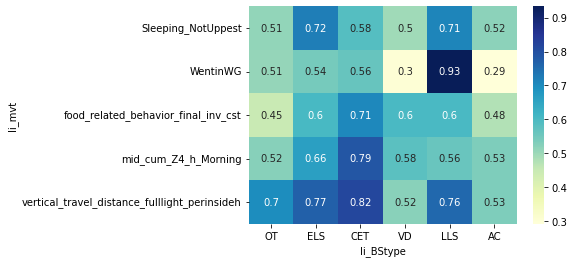

In [133]:
#all R with colors
df_plt = df_R.pivot(index='li_mvt', columns='li_BStype', values='li_R')#.reset_index()
df_plt = df_plt[['OT','ELS','CET','VD','LLS','AC']]
#df_plt
li_col = list(df_R['li_BStype'].unique())
li_col
# If we do a heatmap, we just observe that one column has higher values than others:
sns.heatmap(df_plt, cmap='YlGnBu', annot=True,
            xticklabels=list(df_plt.columns), yticklabels=list(df_plt.index))
plt.savefig(os.path.join(path_extracted_data,'R_all.png'),dpi=300,format='png',bbox_inches='tight')
plt.show()

In [134]:
#todo:https://www.python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap

### row wise - mvt wise

In [135]:
#https://stackoverflow.com/questions/38246559/how-to-create-a-heat-map-in-python-that-ranges-from-green-to-red
cmap_ = LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

li_BStype,OT,ELS,CET,VD,LLS,AC
li_mvt,,,,,,
Sleeping_NotUppest,0.066665,1.000000,0.394720,0.000000,0.964801,0.101053
WentinWG,0.339132,0.394450,0.424209,0.014442,1.000000,0.000000
food_related_behavior_final_inv_cst,0.000000,0.598202,1.000000,0.590620,0.594286,0.108995
mid_cum_Z4_h_Morning,0.000000,0.528022,1.000000,0.207731,0.141373,0.043529
vertical_travel_distance_fulllight_perinsideh,0.598013,0.832499,1.000000,0.000000,0.792046,0.040857


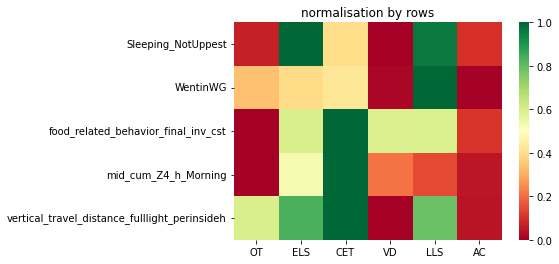

In [138]:
#normalize by row
df_plt_nr = df_plt.copy()
#list(df_plt_nc.index): keep same order
for mv in list(df_plt_nr.index): 
    df_plt_nr.loc[mv] = (df_plt_nr.loc[mv]-df_plt_nr.loc[mv].min())/(df_plt_nr.loc[mv].max()-df_plt_nr.loc[mv].min())
display(df_plt_nr)
sns.heatmap(df_plt_nr, cmap='RdYlGn', annot=False,
        xticklabels=list(df_plt_nr.columns), yticklabels=list(df_plt_nr.index))
plt.xlabel('');
plt.ylabel('');
plt.title('normalisation by rows')
plt.savefig(os.path.join(path_extracted_data,'R_normalizedrowwise.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

In [139]:
#TODO with Var, mean of tempearture or age
#sns.scatterplot()

### columns wise - within context

li_BStype,OT,ELS,CET,VD,LLS,AC
li_mvt,,,,,,
Sleeping_NotUppest,0.255193,0.787052,0.083323,0.653061,0.407982,0.936685
WentinWG,0.245818,0.000000,0.000000,0.000000,1.000000,0.000000
food_related_behavior_final_inv_cst,0.000000,0.259477,0.563079,1.000000,0.110629,0.758079
mid_cum_Z4_h_Morning,0.301657,0.525221,0.875025,0.923706,0.000000,1.000000
vertical_travel_distance_fulllight_perinsideh,1.000000,1.000000,1.000000,0.732905,0.524320,0.992091


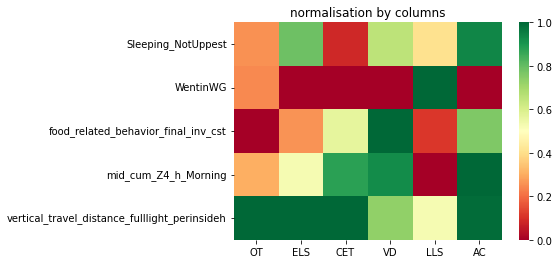

In [140]:
#normalize by column
df_plt_nc = (df_plt[li_col]-df_plt[li_col].min())/(df_plt[li_col].max()-df_plt[li_col].min())
display(df_plt_nc)
sns.heatmap(df_plt_nc, cmap='RdYlGn', annot=False,
            xticklabels=list(df_plt_nc.columns), yticklabels=list(df_plt_nc.index))
plt.xlabel('');
plt.ylabel('');
plt.title('normalisation by columns')
plt.savefig(os.path.join(path_extracted_data,'R_normalizedcolumnwise.png'),dpi=300,format='png',bbox_inches='tight')
plt.show();

#not sure about this, to think mroe if we want this!! TODO. shouldtn latency_1_Zone_15mn_3h be like mid_cum_Z4_h_Morning?
dico_mvt_type = {'food_related_behavior_final_inv_cst':'movement', 
                 'mid_cum_Z4_h_Morning':'space use',
                 'Sleeping_NotUppest':'space use',
                 'vertical_travel_distance_fulllight_perinsideh':'movement',
                 'latency_1_Zone_15mn_3h':'movement'}
df_ = df_plt_nc.reset_index()
df_['mvt_type'] = df_['li_mvt'].map(lambda x: dico_mvt_type[x])
df_ = pd.melt(df_, id_vars=['li_mvt', 'mvt_type'], value_vars=list(df_R['li_BStype'].unique()), value_name = 'BStype')
display(df_.head(3))
plt.figure(figsize=(10,5))
#sns.boxplot(x='mvt_type', y='BStype', data=df_, hue='li_mvt');
sns.boxplot(x='mvt_type', y='BStype', data=df_[df_['li_BStype'].isin(['LP2', 'LP10', 'time'])], hue='li_BStype', color='grey');